## Tree based algorithms

Tree-based methods are used for both regression and classification problems. Tree based methods recursively stratify or segment the feature space into a number of simple regions ( classes or real value output) using some decision rules •  Since the set of splitting rules used to segment the predictor space can be summarized in a tree, these types of approaches are known as decision-tree methods.

![](../files/tree.png)

[Source]( https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html)

A decision tree is drawn upside down with its root at the top. The points along the tree where the predictor space is split are referred to as decision or internal nodes. Each decision node checks conditions on a single feature value. The end of the branch that doesn’t split anymore is the terminal node or /leaf.

A high dimensional feature space is partitioned into decision regions using a top-down greedy approach. The approach is considered greedy because at each step of the tree-building process, the best split is made at that particular step, rather than looking ahead and picking a split that will lead to a better tree in some future step.
The splitting the nodes at the most important features on each decision node is done such that the splitting minimizes  the impurities in child nodes compared to parent nodes. In the case of a regression model, mean square error between y and y hat is used as the measure of impurity.

![](../files/mse-tree.png)

,where Nt is the number of training samples at node t, Dt is the training subset at node t. The MSE thus calculated is also known as node variance and the splitting criterion is better known as variance reduction.
In the classification setting, either Gini index or information gain is used as the measure of impurity of nodes. 
Gini index is defined by, 

![](../files/gini.png)

Where _pi_i is the proportion of the samples that belongs to class _c_ for a given node.  A small Gini value indicates that a node contains observations predominantly from a single class.
An alternative to the Gini index is cross-entropy, given by,

![](../files/entropy.png)


Decision trees have a large number of characteristics that make them an attractive option for building prediction models. They can readily accommodate nonlinear responses, variable interactions, both continuous and categorical explanatory variables, and missing values and are relatively unaffected by outliers. Decision trees can also handle large data sets and large numbers of variables and are useful for variable reduction because a measure of the relative importance of the different variables can be calculated. Trees are intuitive and explainable models and closely mirror human decision-making than other machine learning algorithms. However, the predictive ability is typically inferior compared to more advanced machine learning approaches. Ensemble methods  combine multiple trees to yield a single consensus prediction that can often result in major improvements in prediction accuracy, at the expense of some loss interpretation.

### Bagging

In ensemble learning theory, weak learners (or base models) can be composed together for designing more complex models by combining several of them. Even if  these weak learners do not perform so well by themselves,  the combinations of  several of them together can create strong learners (or ensemble models) that typically achieve better performances.
Bagging is  a general purpose ensemble method in which predictions from several individual weak learners are averaged to obtain a model with lower variance. Fitting several models with independent data, however, requires a large amount of training data sets. Instead of independent samples, bagging methods employ repeated samples from the training data set using bootstrap methods. Each bootstrapped sample acts as almost independent samples drawn from true distribution. Decision trees are then repeatedly fit to bootstrapped subsets of the observations.

In regression tasks, the outputs of individual models can be averaged to obtain the output of the ensemble model. For classification problems, either the most common label or the average of the  class probabilities outputted by individual learners can be used to determine the class label.

### Random Forest

Random forest uses bootstrapping to select samples that are then subjected to model fitting, but only a small number of randomly selected features are used to find the best split at each node. Thus  random forests provide an improvement over bagging by using the additional trick that helps decorrelate the individual trees. When growing an individual tree over bootstrapped samples, a random selection of predictors is chosen as split candidates from the full set of  predictors. The sampling over features further reduces the correlation between the outputs of the trees grown on bootstrapped samples and thereby reduces the variance.

### Boosting

Boosting is another general purpose ensemble method that can, in principle, be applied to different machine learning techniques. While with bagging, decision trees were fitted to each bootstrapping samples independent of each other, trees are grown sequentially one at a time using information from previously grown trees in boosting so that the new tree corrects errors from the previously trained tree.

General tree boosting algorithms, like AdaBoost, correct these errors by increasing the weight of observations that were previously misclassified. The second classifier will likely get some other samples wrong and the weights are adjusted accordingly.

Gradient boosting corrects these errors by sequentially building many small trees to model the pattern in residuals from the previous iteration until no more pattern exists in the residuals. The modelled residuals are added back to the existing model. The addition of  residual predicted by a weak model to an existing model's approximation nudges the model towards the correct target. 

## Classification using decision tree in Scikt-learn

DecisionTreeClassifier is a class for performing multi-class classification from `tree` module of Scikit-learn. DecisionTreeClassifier is capable of both binary as well as multiclass classification.

`class sklearn.tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)`

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, random_state = 1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train_std, y_train);

from sklearn import metrics
y_pred = clf.predict(X_test_std);
metrics.accuracy_score(y_test, y_pred)

0.9555555555555556

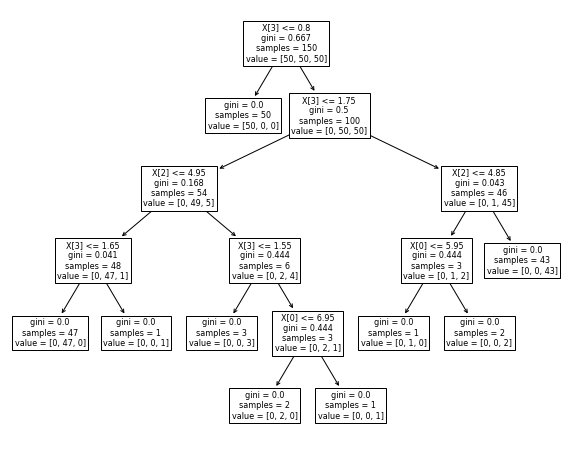

In [9]:
from IPython.display import display
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8))
tree.plot_tree(clf.fit(X, y)) ;

### Classification with Random Forests

`class sklearn.ensemble.RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)[source]`¶

In [16]:
from sklearn import ensemble
clf = ensemble.RandomForestClassifier(n_estimators = 100, max_depth = 4, random_state = 1)
clf.fit(X_train_std, y_train);

y_pred = clf.predict(X_test_std);
metrics.accuracy_score(y_test, y_pred)

0.9555555555555556